## Set up

Use conda to install seaborn by running in a terminal

conda install seaborn

In [ ]:
# imports a library 'pandas', names it as 'pd'

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

####What problem does pandas solve?

Python has long been great for data munging and preparation, but less so for data analysis and modeling. pandas helps fill this gap, enabling you to carry out your entire data analysis workflow in Python without having to switch to a more domain specific language like R.

Combined with the excellent IPython toolkit and other libraries, the environment for doing data analysis in Python excels in performance, productivity, and the ability to collaborate.

pandas does not implement significant modeling functionality outside of linear and panel regression; for this, look to statsmodels and scikit-learn. More work is still needed to make Python a first class statistical modeling environment, but we are well on our way toward that goal.

http://pandas.pydata.org/

In [ ]:
# various options in pandas

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.precision', 3)

## Load a data set

"Census Income" dataset

http://archive.ics.uci.edu/ml/

In [ ]:
# download the data and name the columns
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
        'marital_status', 'occupation', 'relationship', 'ethnicity',
        'gender', 'capital_gain', 'capital_loss', 'hours_per_week',
        'country_of_origin', 'income']

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                       names = cols)

pandas can load a lot more than csvs, this tutorial shows how pandas can read excel, sql,
and even copy and paste...

http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/

## View

In [ ]:
# we can see there are no null values
# columns with numberical values are type int64, no need to set data type

df.info()

In [ ]:
# to view the first 5 or specify with ex: .head(10)
df.head()

In [6]:
# there's a space before each string in this data
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [7]:
# looks like it's in every object column
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay', ' Never-worked'], dtype=object)

## Strip spaces in columns

In [8]:
# loop through each column and strip all the spaces

for col in df:
    if df[col].dtype == 'O':
        df[col] = df[col].map(lambda x: x.strip(' '))

In [ ]:
# Here's a break down of what that for loop is doing

In [ ]:
# loops through df and gets the column names
for col in df:
    print col

In [ ]:
# gets the column type
df.education.dtype

In [ ]:
# if True then applys the map function
df.education.dtype == object

In [ ]:
# strip function
x = ' string'
x.strip(' ')

In [ ]:
# lambda creates a 'throw away' or 'anonymous' function
strip_string = lambda x: x.strip(' ')
strip_string(' string')

In [ ]:
# same as this
def strip_string2(x):
    x = x.strip(' ')
    return x

In [ ]:
strip_string2(' string')

In [ ]:
# map applies the function to each item in the data frame column so

df[col].map(lambda x: x.strip(' '))

# does the same thing as

df['workclass'].map(strip_string2)

# but in the first case we don't have to define and name a function

for more info on lambda and map

http://www.python-course.eu/lambda.php

## Descriptive 

In [9]:
df.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
dtype: int64

In [10]:
df.hours_per_week.mean()

40.437455852092995

In [11]:
df[['age', 'capital_gain', 'capital_loss', 'hours_per_week']].describe()

,age,capital_gain,capital_loss,hours_per_week
count,32561.00,32561.00,32561.00,32561.00
mean,38.58,1077.65,87.30,40.44
std,13.64,7385.29,402.96,12.35
min,17.00,0.00,0.00,1.00
25%,28.00,0.00,0.00,40.00
50%,37.00,0.00,0.00,40.00
75%,48.00,0.00,0.00,45.00
max,90.00,99999.00,4356.00,99.00


## Find nulls

In [12]:
# as we saw with df.info() there are no nulls... 
# but if there were this would find the rows where age is null
df[df.age.isnull()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income


In [13]:
# you could drop all those rows with
df_no_nulls = df[df.age.notnull()]

## Fill nulls

In [14]:
null_df = pd.DataFrame([1,2,4,np.nan], columns = ['column1'])

In [15]:
null_df

,column1
0,1
1,2
2,4
3,NaN


In [16]:
# you can also fill nulls with a value or string
null_df.column1.fillna(1000)

0       1
1       2
2       4
3    1000
Name: column1, dtype: float64

In [17]:
null_df.column1.fillna(null_df.column1.median())

0    1
1    2
2    4
3    2
Name: column1, dtype: float64

In [18]:
null_df.column1.fillna('string')

0         1
1         2
2         4
3    string
Name: column1, dtype: object

## Selecting rows and columns 

In [19]:
# select a row
df.iloc[0]

age                             39
workclass                State-gov
fnlwgt                       77516
education                Bachelors
education_num                   13
marital_status       Never-married
occupation            Adm-clerical
relationship         Not-in-family
ethnicity                    White
gender                        Male
capital_gain                  2174
capital_loss                     0
hours_per_week                  40
country_of_origin    United-States
income                       <=50K
Name: 0, dtype: object

In [ ]:
# select a range of rows
df.iloc[10:15]

In [20]:
# last 2 rows
df.iloc[-2:]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [21]:
# selecting every other row in columns 3-5
df.iloc[::2, 2:5].head()

,fnlwgt,education,education_num
0,77516,Bachelors,13
2,215646,HS-grad,9
4,338409,Bachelors,13
6,160187,9th,5
8,45781,Masters,14


In [22]:
df.loc[0:2, ['age', 'relationship ']]

,age,relationship
0,39,NaN
1,50,NaN
2,38,NaN


## Differences between .loc, .iloc, and .ix

http://pandas.pydata.org/pandas-docs/stable/indexing.html

by label

.loc[]

by integer position

.iloc[]

for both

.ix[]

In [23]:
# pd.DataFrame let's you turn series, arrays, lists, and more into data frame structures

df_index = pd.DataFrame([[1,2,3,4],[2,4,6,8],[3,5,7,9]], [11,13,12], columns = ['A', 'C', 'D', 'B'])

In [24]:
df_index

,A,C,D,B
11,1,2,3,4
13,2,4,6,8
12,3,5,7,9


In [25]:
# iloc indexes by postion, not by the labels in the index
df_index.iloc[0:1]

,A,C,D,B
11,1,2,3,4


In [26]:
# with loc both the start and the stop are included
df_index.loc[11:12]

,A,C,D,B
11,1,2,3,4
13,2,4,6,8
12,3,5,7,9


In [27]:
# select columns by position
df_index.iloc[:,0:1]

,A
11,1
13,2
12,3


In [28]:
# or by label
df_index.loc[:,'A':'D']

,A,C,D
11,1,2,3
13,2,4,6
12,3,5,7


In [29]:
# ix: primarily label based, but will fall back to integer positional access
df_index.ix[:,'A':'C']

,A,C
11,1,2
13,2,4
12,3,5


In [30]:
# ix: primarily label based, but will fall back to integer positional access
df_index.ix[:,0:2]

,A,C
11,1,2
13,2,4
12,3,5


## Rename columns

In [31]:
df.columns

Index([u'age', u'workclass', u'fnlwgt', u'education', u'education_num',
       u'marital_status', u'occupation', u'relationship', u'ethnicity',
       u'gender', u'capital_gain', u'capital_loss', u'hours_per_week',
       u'country_of_origin', u'income'],
      dtype='object')

In [36]:
# replace a column name
df.rename(columns = {'native_country' : 'country_of_origin'}, inplace = False)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Boolean

In [37]:
df.native_country.unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico', 'South',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala', 'China',
       'Japan', 'Yugoslavia', 'Peru', 'Outlying-US(Guam-USVI-etc)',
       'Scotland', 'Trinadad&Tobago', 'Greece', 'Nicaragua', 'Vietnam',
       'Hong', 'Ireland', 'Hungary', 'Holand-Netherlands'], dtype=object)

In [38]:
df[df.native_country == 'United-States'].head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [39]:
df[(df.native_country != 'United-States') & (df.education_num > 9)].head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K


In [40]:
df[(df.native_country != 'United-States') & (df.education_num > 9)].income.value_counts()

<=50K    1137
>50K      536
dtype: int64

## Groupby

In [41]:
# How to groupby column and apply a function like sum, count, or mean
df.groupby(['relationship']).mean()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
relationship,,,,,,
Husband,43.82,187074.86,10.33,1795.06,124.16,44.12
Not-in-family,38.35,191131.80,10.32,743.33,75.39,40.60
Other-relative,33.16,205059.82,8.79,279.60,51.33,37.01
Own-child,24.83,193175.41,9.49,155.66,39.51,33.27
Unmarried,40.29,191128.41,9.64,455.03,41.46,39.10
Wife,39.85,181849.51,10.46,1659.79,118.01,36.86


In [42]:
# To groupby multiple columns with multiple functions attached
df.groupby(['income', 'native_country']).age.agg(['count', 'mean'])
# grouped in order of which column is listed first

count   mean
income native_country                  
<=50K  ?                     437  36.85
       Cambodia               12  35.67
       Canada                 82  41.01
       China                  55  41.80
       Columbia               57  39.23
       Cuba                   70  47.29
       Dominican-Republic     68  37.94
       Ecuador                24  34.83
       El-Salvador            97  32.65
       England                60  38.97
...                          ...    ...
>50K   Portugal                4  40.00
       Puerto-Rico            12  46.50
       Scotland                3  52.67
       South                  16  44.88
       Taiwan                 20  40.80
       Thailand                3  32.67
       Trinadad&Tobago         2  42.50
       United-States        7171  44.30
       Vietnam                 5  35.40
       Yugoslavia              6  40.17

[82 rows x 2 columns]

In [43]:
# combine groupby with boolean

df[df.native_country != 'United-States'].groupby(['education']).hours_per_week.mean()

education
10th            38.42
11th            36.33
12th            40.24
1st-4th         40.27
5th-6th         39.69
7th-8th         40.41
9th             38.08
Assoc-acdm      38.74
Assoc-voc       41.30
Bachelors       41.84
Doctorate       45.29
HS-grad         40.32
Masters         41.24
Preschool       40.91
Prof-school     47.03
Some-college    38.74
Name: hours_per_week, dtype: float64

## plotting with pandas

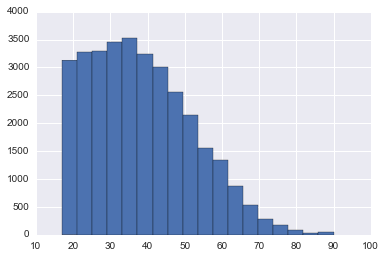

In [44]:
df.age.hist(bins = 18);

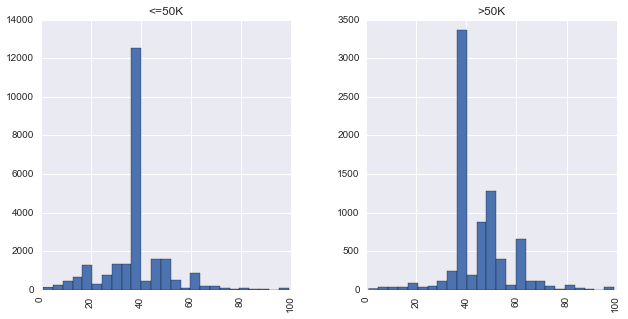

In [45]:
# split the histograms by another column (with relatively few unique values)
df.hours_per_week.hist(by = df.income, bins = 25, figsize = (10,5));

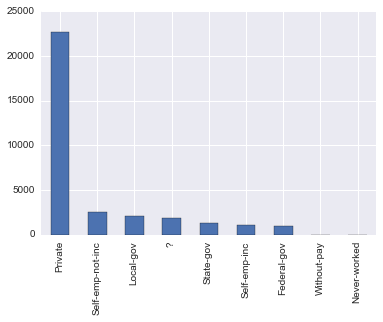

In [46]:
# use value_counts() and a bar plot
df['workclass'].value_counts().plot(kind = 'bar')

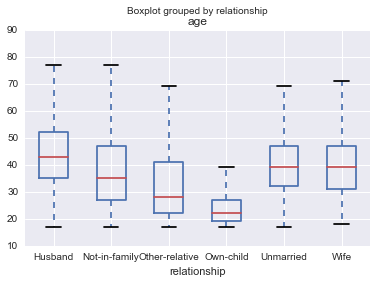

In [47]:
df.boxplot(['age'], by = 'relationship');

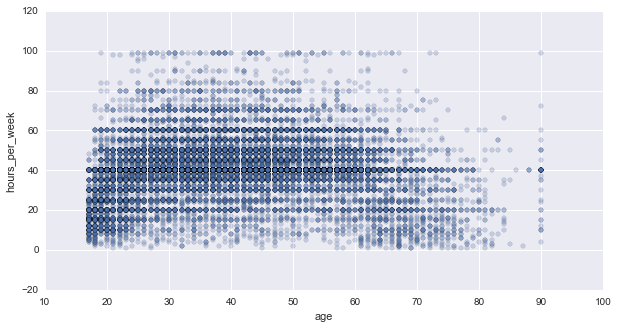

In [48]:
df.plot(kind='scatter',
        x = 'age',
        y ='hours_per_week',
        alpha = .25,
        figsize = (10,5))

## Practice Exercises

In [ ]:
# how many males and females are in this data set

In [ ]:
# plot the total number of people in each occupation

In [ ]:
# what is the lowest average age of an occupation

In [ ]:
# create a boxplot of hours per week by education level

In [ ]:
# create a new column for income where >50K = 1 and <=50K = 0

# hint... http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html

In [ ]:
# find which "native_country" has the highest percent of people earning >50K

In [ ]:
# visualize what percent of people earn over 50K by education level

## Extra practice

In [ ]:
# make a hexbin plot

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

In [ ]:
# check out plotting with Seaborn

http://nbviewer.ipython.org/gist/mwaskom/8224591

http://stanford.edu/~mwaskom/software/seaborn/tutorial/plotting_distributions.html